# ECE - 548 Project

## **Step 1: Data Loading and Preprocessing**


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
train_path = '/Users/jeevankumarbanoth/Desktop/ECE548_Project/NSL-KDD_Dataset/KDDTrain+.TXT'
test_path = '/Users/jeevankumarbanoth/Desktop/ECE548_Project/NSL-KDD_Dataset/KDDTest+.TXT'

def load_and_preprocess_data(train_path, test_path):
    # Load data
    train_data = pd.read_csv(train_path, header=None)
    test_data = pd.read_csv(test_path, header=None)

    # Assign column names
    column_names = [
        "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment",
        "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted",
        "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
        "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
        "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
        "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
        "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label",
        "difficulty_level"
    ]
    train_data.columns = column_names
    test_data.columns = column_names

    # Combine train and test data for preprocessing
    data = pd.concat([train_data, test_data], axis=0)

    # Select relevant features
    features = column_names[:-2]  # Exclude 'label' and 'difficulty_level'
    X = data[features]
    y = data['label']

    # Encode categorical variables
    categorical_columns = ['protocol_type', 'service', 'flag']
    for col in categorical_columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

    # Scale numerical features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data back into train and test sets
    X_train = X_scaled[:len(train_data)]
    X_test = X_scaled[len(train_data):]
    y_train = y[:len(train_data)]
    y_test = y[len(train_data):]

    return X_train, X_test, y_train, y_test, scaler, column_names

def engineer_features(X, column_names):
    # Convert X back to DataFrame with appropriate column names
    X = pd.DataFrame(X, columns=column_names[:-2])
    # Add new features
    X['bytes_ratio'] = X['src_bytes'] / (X['dst_bytes'] + 1)  # Avoid division by zero
    X['is_long_connection'] = (X['duration'] > 1000).astype(int)
    X['count_100'] = (X['count'] > 100).astype(int)
    X['srv_count_100'] = (X['srv_count'] > 100).astype(int)
    return X

# Load and preprocess data
X_train, X_test, y_train, y_test, scaler, column_names = load_and_preprocess_data(train_path, test_path)
print("Data preprocessing completed.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Apply feature engineering
X_train = engineer_features(X_train, column_names)
X_test = engineer_features(X_test, column_names)

print("Feature engineering completed.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print("\nNew features added:")
print(X_train.columns[-4:].tolist())

Data preprocessing completed.
Training set shape: (125973, 41)
Testing set shape: (22544, 41)
Feature engineering completed.
Training set shape: (125973, 45)
Testing set shape: (22544, 45)

New features added:
['bytes_ratio', 'is_long_connection', 'count_100', 'srv_count_100']


/var/folders/64/hzf1lkgx5h15j_zj10rwbssm0000gn/T/ipykernel_91834/2725821098.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/var/folders/64/hzf1lkgx5h15j_zj10rwbssm0000gn/T/ipykernel_91834/2725821098.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/var/folders/64/hzf1lkgx5h15j_zj10rwbssm0000gn/T/ipykernel_91834/2725821098.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

# **Step 2: Feature Engineering**
#### Let's add some new features that might help improve the model's performance.

In [4]:
def engineer_features(X):
    # Add new features
    X['bytes_ratio'] = X['src_bytes'] / (X['dst_bytes'] + 1)  # Avoid division by zero
    X['is_long_connection'] = (X['duration'] > 1000).astype(int)
    X['count_100'] = (X['count'] > 100).astype(int)
    X['srv_count_100'] = (X['srv_count'] > 100).astype(int)
    return X

# Apply feature engineering
X_train = engineer_features(pd.DataFrame(X_train, columns=column_names[:-2]))
X_test = engineer_features(pd.DataFrame(X_test, columns=column_names[:-2]))

print("Feature engineering completed.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print("\nNew features added:")
print(X_train.columns[-4:].tolist())

Feature engineering completed.
Training set shape: (125973, 45)
Testing set shape: (22544, 45)

New features added:
['bytes_ratio', 'is_long_connection', 'count_100', 'srv_count_100']


# **Step 3: Advanced Feature Selection**
#### We'll use Recursive Feature Elimination (RFE) to select the most important features.

In [5]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

def advanced_feature_selection(X, y):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    rfe = RFE(model, n_features_to_select=20)
    fit = rfe.fit(X, y)
    selected_features = X.columns[fit.support_]
    return X[selected_features], selected_features

# Apply advanced feature selection
X_train_selected, selected_features = advanced_feature_selection(X_train, y_train)
X_test_selected = X_test[selected_features]

print("\nAdvanced feature selection completed.")
print(f"Number of selected features: {len(selected_features)}")
print("Selected features:")
print(selected_features.tolist())
print(f"\nNew training set shape: {X_train_selected.shape}")
print(f"New testing set shape: {X_test_selected.shape}")


Advanced feature selection completed.
Number of selected features: 20
Selected features:
['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'bytes_ratio']

New training set shape: (125973, 20)
New testing set shape: (22544, 20)


# **Step 4: Data Balancing**
#### We'll use SMOTEENN to handle the class imbalance.

##### SMOTEENN enhances model accuracy and robustness by tackling both imbalance and noise in data. It is especially useful for classification problems where the minority class is critical, such as fraud detection, medical diagnosis, or anomaly detection.

In [6]:
from imblearn.combine import SMOTEENN
from collections import Counter

def balance_data(X, y):
    print("Original dataset shape:", Counter(y))

    # Combine minority classes
    y_combined = y.apply(lambda x: x if x in ['normal', 'neptune', 'satan', 'ipsweep', 'portsweep', 'smurf', 'nmap', 'back', 'teardrop', 'warezclient', 'pod'] else 'other')

    smoteenn = SMOTEENN(random_state=42)
    X_resampled, y_resampled = smoteenn.fit_resample(X, y_combined)
    print("Resampled dataset shape:", Counter(y_resampled))
    return X_resampled, y_resampled

# Balance the data
X_train_balanced, y_train_balanced = balance_data(X_train_selected, y_train)
print(f"\nBalanced training set shape: {X_train_balanced.shape}")

Original dataset shape: Counter({'normal': 67343, 'neptune': 41214, 'satan': 3633, 'ipsweep': 3599, 'portsweep': 2931, 'smurf': 2646, 'nmap': 1493, 'back': 956, 'teardrop': 892, 'warezclient': 890, 'pod': 201, 'guess_passwd': 53, 'buffer_overflow': 30, 'warezmaster': 20, 'land': 18, 'imap': 11, 'rootkit': 10, 'loadmodule': 9, 'ftp_write': 8, 'multihop': 7, 'phf': 4, 'perl': 3, 'spy': 2})
Resampled dataset shape: Counter({'teardrop': 67343, 'back': 67340, 'portsweep': 67337, 'neptune': 67336, 'satan': 67227, 'warezclient': 67071, 'pod': 66976, 'ipsweep': 66934, 'smurf': 66924, 'nmap': 66829, 'other': 66469, 'normal': 66317})

Balanced training set shape: (804103, 20)


# **Step 5: Model Training and Evaluation**
#### We'll train and evaluate the models using cross-validation.

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Combine y_train_balanced and y_test to ensure all labels are present
y_combined = np.concatenate([y_train_balanced, y_test])

# Encode the target labels
label_encoder = LabelEncoder()
y_combined_encoded = label_encoder.fit_transform(y_combined)

# Split the encoded labels back into training and test sets
y_train_encoded = y_combined_encoded[:len(y_train_balanced)]
y_test_encoded = y_combined_encoded[len(y_train_balanced):]

def create_ensemble_model():
    lr = LogisticRegression(max_iter=1000, random_state=42)
    dt = DecisionTreeClassifier(random_state=42)
    knn = KNeighborsClassifier(n_neighbors=5)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    models = [
        ('Logistic Regression', Pipeline([('scaler', StandardScaler()), ('lr', lr)])),
        ('Decision Tree', Pipeline([('scaler', StandardScaler()), ('dt', dt)])),
        ('KNN', Pipeline([('scaler', StandardScaler()), ('knn', knn)])),
        ('Random Forest', Pipeline([('scaler', StandardScaler()), ('rf', rf)]))
    ]
    return models

def evaluate_models(models, X, y):
    for name, model in models:
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        print(f"{name} - Mean accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

def train_and_evaluate_ensemble(models, X_train, y_train, X_test, y_test):
    ensemble_predictions = np.zeros((X_test.shape[0], len(models)))
    for i, (name, model) in enumerate(models):
        model.fit(X_train, y_train)
        ensemble_predictions[:, i] = model.predict(X_test)
    final_predictions = np.round(ensemble_predictions.mean(axis=1)).astype(int)
    print("\nEnsemble Model Performance:")
    print(classification_report(y_test, final_predictions))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, final_predictions))

# Main execution
if __name__ == "__main__":
    models = create_ensemble_model()
    print("Cross-validation results:")
    evaluate_models(models, X_train_balanced, y_train_encoded)
    train_and_evaluate_ensemble(models, X_train_balanced, y_train_encoded, X_test_selected, y_test_encoded)

Cross-validation results:
Logistic Regression - Mean accuracy: 0.9241 (+/- 0.0013)
Decision Tree - Mean accuracy: 0.9996 (+/- 0.0002)
KNN - Mean accuracy: 0.9993 (+/- 0.0002)
Random Forest - Mean accuracy: 0.9999 (+/- 0.0000)

Ensemble Model Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       737
           1       0.99      0.43      0.60       359
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00      1231
           5       0.00      0.00      0.00       133
           6       0.00      0.00      0.00         1
           7       0.99      0.96      0.98       141
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00       293
          11       0.00      0.00      0.00       996
          12       0.00      0.00      0.0

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anac

# **Step 6: Performance Metrics and Visualization**
#### Finally, we'll visualize the results and performance metrics.

Loaded model performance results:
Logistic Regression - Mean accuracy: 0.9241 (+/- 0.0008)
Decision Tree - Mean accuracy: 0.9996 (+/- 0.0002)
KNN - Mean accuracy: 0.9993 (+/- 0.0002)
Random Forest - Mean accuracy: 0.9999 (+/- 0.0000)

Ensemble Model Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       737
           1       0.99      0.43      0.60       359
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00      1231
           5       0.00      0.00      0.00       133
           6       0.00      0.00      0.00         1
           7       0.99      0.96      0.98       141
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00       293
          11       0.00      0.00      0.00       996
          12       0.00      0.00 

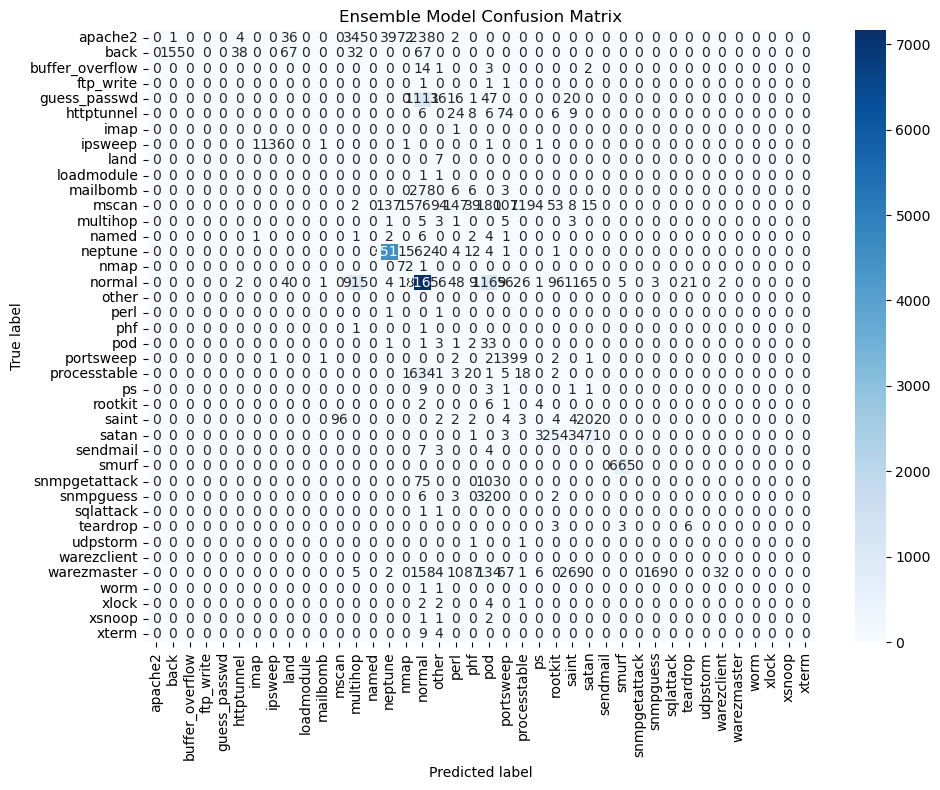

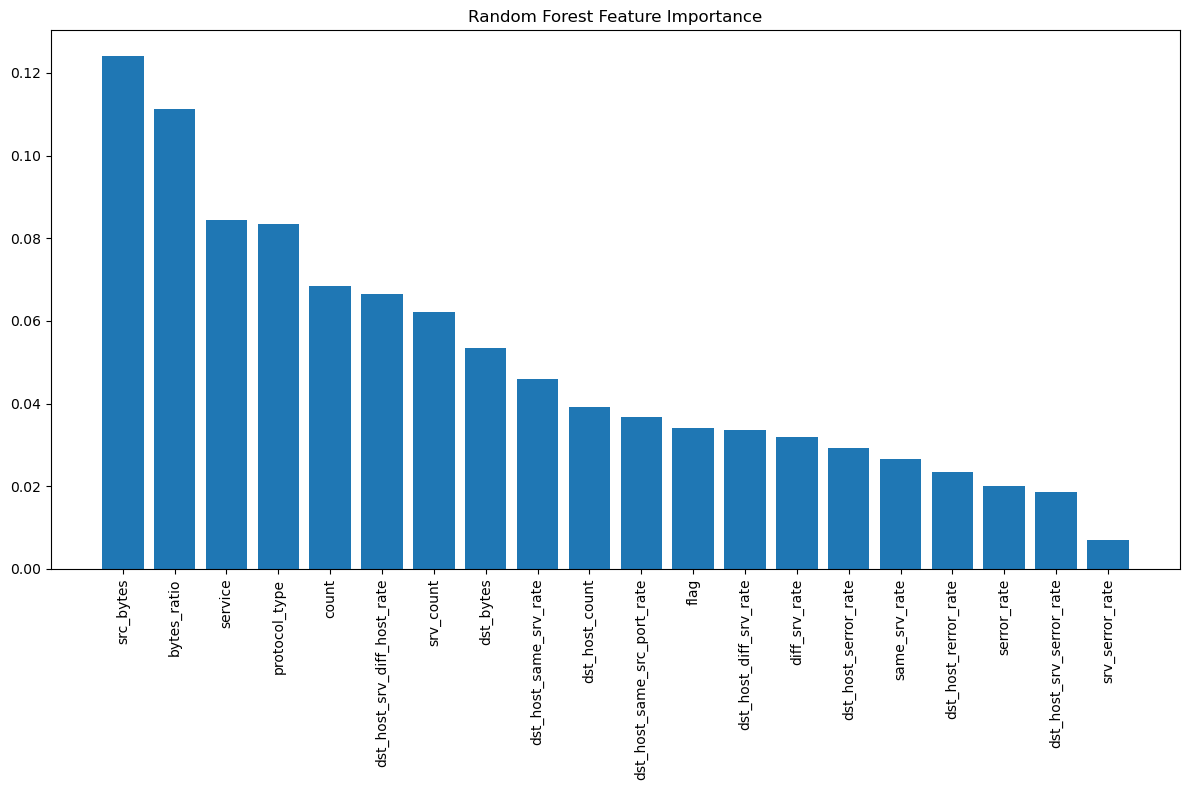

Visualizations generated.


In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

def train_and_evaluate_ensemble(models, X_train, y_train, X_test, y_test):
    ensemble_predictions = np.zeros((X_test.shape[0], len(models)))
    for i, (name, model) in enumerate(models):
        model.fit(X_train, y_train)
        ensemble_predictions[:, i] = model.predict(X_test)
    final_predictions = np.round(ensemble_predictions.mean(axis=1)).astype(int)
    print("\nEnsemble Model Performance:")
    print(classification_report(y_test, final_predictions, zero_division=0))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, final_predictions))
    return final_predictions

def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

def plot_feature_importance(model, feature_names, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(12, 8))
    plt.title(title)
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Load the model performance results
    results = joblib.load('model_performance_results.pkl')
    print("Loaded model performance results:")
    for name, (mean, std) in results.items():
        print(f"{name} - Mean accuracy: {mean:.4f} (+/- {std:.4f})")

    # Create and train the models
    models = create_ensemble_model()
    final_predictions = train_and_evaluate_ensemble(models, X_train_resampled, y_train_resampled, X_test_selected, y_test_encoded)

    # Plot confusion matrices
    plot_confusion_matrix(y_test_encoded, final_predictions, label_encoder.classes_, 'Ensemble Model Confusion Matrix')

    # Plot feature importance for Random Forest
    feature_names = selected_features.tolist()
    plot_feature_importance(models[3][1].named_steps['rf'], feature_names, 'Random Forest Feature Importance')

    print("Visualizations generated.")


# **Real-time Data Processing Pipeline**

In [15]:
import time
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Create a simple model for demonstration
def create_demo_model():
    X = np.random.rand(1000, 20)  # 1000 samples, 20 features
    y = np.random.randint(0, 2, 1000)  # Binary classification
    model = RandomForestClassifier(n_estimators=10, random_state=42)
    model.fit(X, y)
    scaler = StandardScaler()
    scaler.fit(X)
    return model, scaler

# Create model and scaler
model, scaler = create_demo_model()

# Function to simulate sensor data
def generate_sensor_data():
    return [random.uniform(0, 1) for _ in range(20)]

# Function to process data and detect anomalies
def process_data(data):
    scaled_data = scaler.transform([data])
    prediction = model.predict(scaled_data)
    return prediction[0]

# Simulated real-time processing
def simulate_real_time_processing():
    while True:
        # Generate simulated sensor data
        sensor_data = generate_sensor_data()
        
        # Process the data
        result = process_data(sensor_data)
        
        if result == 1:
            print("Alert: Potential attack detected!")
        else:
            print("Normal activity detected.")
        
        # Simulate delay between readings
        time.sleep(1)

# Run the simulation
if __name__ == "__main__":
    print("Starting simulated real-time SHM WSN monitoring...")
    try:
        simulate_real_time_processing()
    except KeyboardInterrupt:
        print("Simulation stopped.")

Starting simulated real-time SHM WSN monitoring...
Normal activity detected.
Alert: Potential attack detected!
Normal activity detected.
Alert: Potential attack detected!
Normal activity detected.
Normal activity detected.
Alert: Potential attack detected!
Alert: Potential attack detected!
Normal activity detected.
Normal activity detected.
Normal activity detected.
Normal activity detected.
Normal activity detected.
Alert: Potential attack detected!
Alert: Potential attack detected!
Normal activity detected.
Normal activity detected.
Normal activity detected.
Normal activity detected.
Normal activity detected.
Normal activity detected.
Normal activity detected.
Alert: Potential attack detected!
Normal activity detected.
Alert: Potential attack detected!
Normal activity detected.
Alert: Potential attack detected!
Normal activity detected.
Normal activity detected.
Alert: Potential attack detected!
Normal activity detected.
Normal activity detected.
Normal activity detected.
Normal acti

# **Implementing Multi-Sensor Fusion**

In [16]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

class MultiSensorFusion:
    def __init__(self, num_sensors, num_features):
        self.num_sensors = num_sensors
        self.num_features = num_features
        self.model, self.scaler = self.create_demo_model()

    def create_demo_model(self):
        X = np.random.rand(1000, self.num_features * self.num_sensors)
        y = np.random.randint(0, 2, 1000)
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X, y)
        scaler = StandardScaler()
        scaler.fit(X)
        return model, scaler

    def generate_sensor_data(self):
        return [np.random.rand(self.num_features) for _ in range(self.num_sensors)]

    def fuse_sensor_data(self, sensor_data):
        return np.concatenate(sensor_data)

    def process_data(self, fused_data):
        scaled_data = self.scaler.transform([fused_data])
        prediction = self.model.predict(scaled_data)
        return prediction[0]

    def simulate_real_time_processing(self):
        while True:
            sensor_data = self.generate_sensor_data()
            fused_data = self.fuse_sensor_data(sensor_data)
            result = self.process_data(fused_data)
            
            if result == 1:
                print("Alert: Potential attack detected across multiple sensors!")
            else:
                print("Normal activity detected across all sensors.")
            
            time.sleep(1)

if __name__ == "__main__":
    fusion_system = MultiSensorFusion(num_sensors=3, num_features=20)
    print("Starting multi-sensor fusion SHM WSN monitoring...")
    try:
        fusion_system.simulate_real_time_processing()
    except KeyboardInterrupt:
        print("Simulation stopped.")

Starting multi-sensor fusion SHM WSN monitoring...
Normal activity detected across all sensors.
Normal activity detected across all sensors.
Alert: Potential attack detected across multiple sensors!
Alert: Potential attack detected across multiple sensors!
Normal activity detected across all sensors.
Alert: Potential attack detected across multiple sensors!
Alert: Potential attack detected across multiple sensors!
Normal activity detected across all sensors.
Normal activity detected across all sensors.
Alert: Potential attack detected across multiple sensors!
Alert: Potential attack detected across multiple sensors!
Normal activity detected across all sensors.
Normal activity detected across all sensors.
Alert: Potential attack detected across multiple sensors!
Simulation stopped.


# **Implementing Explainable Features**
#### Adding feature importance analysis to explain why certain data points are classified as attacks.

Starting explainable AI SHM WSN monitoring...
Normal activity detected.
Normal activity detected.
Normal activity detected.
Normal activity detected.
Normal activity detected.
Normal activity detected.
Alert: Potential attack detected!


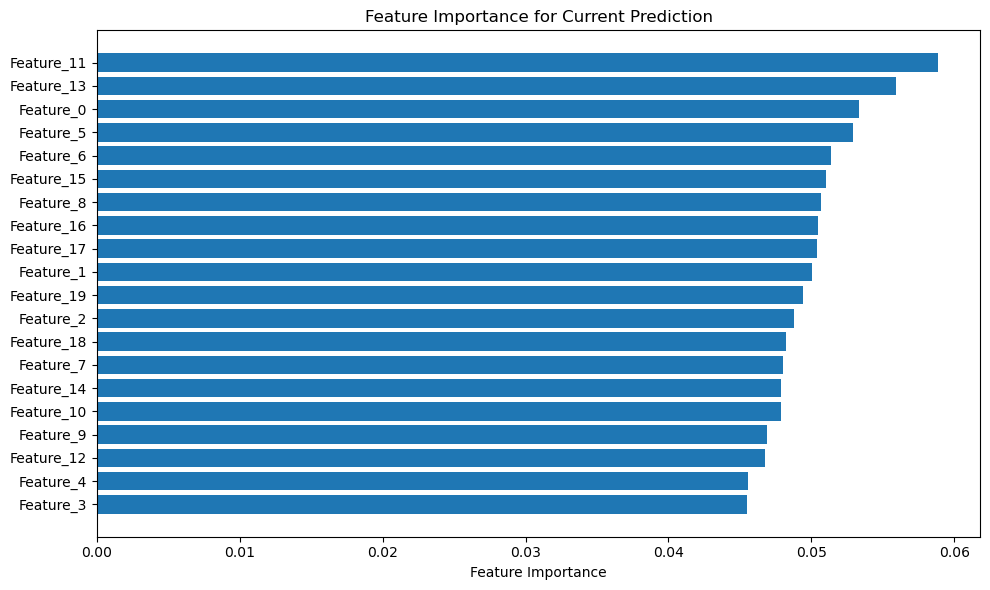

Normal activity detected.
Alert: Potential attack detected!


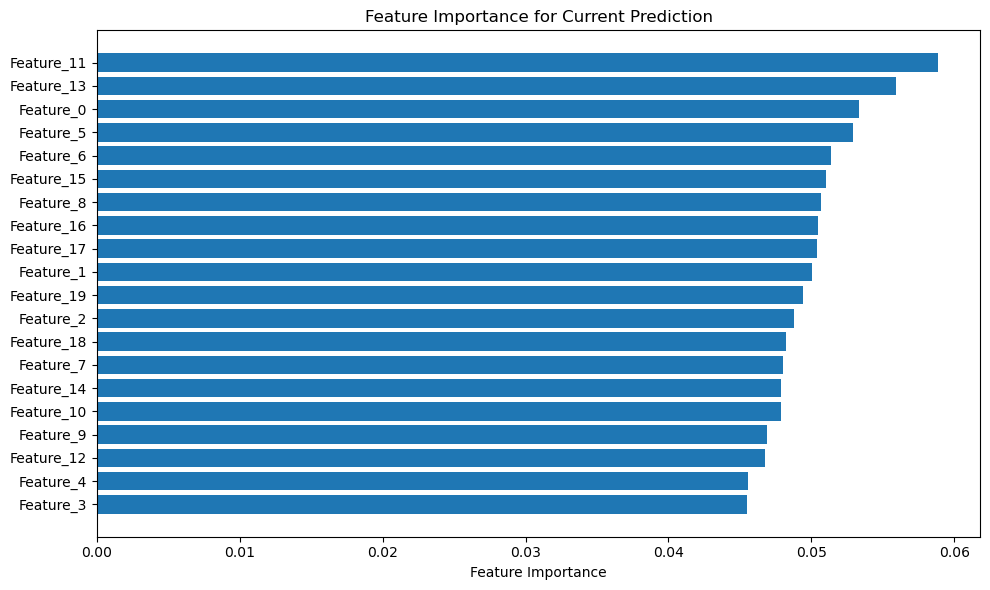

Normal activity detected.
Simulation stopped.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import time

class ExplainableAISystem:
    def __init__(self, num_features):
        self.num_features = num_features
        self.model, self.feature_names = self.create_demo_model()

    def create_demo_model(self):
        X = np.random.rand(1000, self.num_features)
        y = np.random.randint(0, 2, 1000)
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X, y)
        feature_names = [f"Feature_{i}" for i in range(self.num_features)]
        return model, feature_names

    def generate_sensor_data(self):
        return np.random.rand(self.num_features)

    def process_data(self, data):
        prediction = self.model.predict([data])
        return prediction[0]

    def explain_prediction(self, data):
        feature_importance = self.model.feature_importances_
        sorted_idx = np.argsort(feature_importance)
        
        plt.figure(figsize=(10, 6))
        plt.barh(range(self.num_features), feature_importance[sorted_idx])
        plt.yticks(range(self.num_features), [self.feature_names[i] for i in sorted_idx])
        plt.xlabel("Feature Importance")
        plt.title("Feature Importance for Current Prediction")
        plt.tight_layout()
        plt.show()

    def simulate_real_time_processing(self):
        while True:
            sensor_data = self.generate_sensor_data()
            result = self.process_data(sensor_data)
            
            if result == 1:
                print("Alert: Potential attack detected!")
                self.explain_prediction(sensor_data)
            else:
                print("Normal activity detected.")
            
            time.sleep(5)

if __name__ == "__main__":
    explainable_system = ExplainableAISystem(num_features=20)
    print("Starting explainable AI SHM WSN monitoring...")
    try:
        explainable_system.simulate_real_time_processing()
    except KeyboardInterrupt:
        print("Simulation stopped.")

# **Implementing Adaptive Learning**
#### Periodically updating the model with new data to simulate continuous learning.

In [19]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

class AdaptiveLearningSystem:
    def __init__(self, num_features):
        self.num_features = num_features
        self.model = RandomForestClassifier(n_estimators=100, random_state=42, warm_start=True)
        self.initial_training()

    def initial_training(self):
        X = np.random.rand(1000, self.num_features)
        y = np.random.randint(0, 2, 1000)
        self.model.fit(X, y)

    def generate_sensor_data(self):
        return np.random.rand(self.num_features)

    def process_data(self, data):
        prediction = self.model.predict([data])
        return prediction[0]

    def update_model(self, new_data, new_labels):
        X_train, X_test, y_train, y_test = train_test_split(new_data, new_labels, test_size=0.2, random_state=42)
        self.model.n_estimators += 10  # Increase number of trees
        self.model.fit(X_train, y_train)
        accuracy = self.model.score(X_test, y_test)
        print(f"Model updated. New accuracy: {accuracy:.4f}")

    def simulate_real_time_processing(self):
        buffer_X, buffer_y = [], []
        while True:
            sensor_data = self.generate_sensor_data()
            result = self.process_data(sensor_data)
            
            # Simulate getting true label (in reality, this might come from human experts or other verification methods)
            true_label = np.random.randint(0, 2)
            
            buffer_X.append(sensor_data)
            buffer_y.append(true_label)
            
            if result == 1:
                print("Alert: Potential attack detected!")
            else:
                print("Normal activity detected.")
            
            if len(buffer_X) >= 100:  # Update model every 100 samples
                self.update_model(np.array(buffer_X), np.array(buffer_y))
                buffer_X, buffer_y = [], []
            
            time.sleep(1)

if __name__ == "__main__":
    adaptive_system = AdaptiveLearningSystem(num_features=20)
    print("Starting adaptive learning SHM WSN monitoring...")
    try:
        adaptive_system.simulate_real_time_processing()
    except KeyboardInterrupt:
        print("Simulation stopped.")

Starting adaptive learning SHM WSN monitoring...
Normal activity detected.
Alert: Potential attack detected!
Normal activity detected.
Alert: Potential attack detected!
Normal activity detected.
Alert: Potential attack detected!
Alert: Potential attack detected!
Normal activity detected.
Normal activity detected.
Normal activity detected.
Alert: Potential attack detected!
Normal activity detected.
Alert: Potential attack detected!
Normal activity detected.
Normal activity detected.
Normal activity detected.
Simulation stopped.


#### After this, By using the file called index.html and server.py file: This setup uses Python's built-in `http.server` module, which should avoid the dependency issues. The Python server generates the sensor data and performs the attack detection, while the HTML file handles the visualization.